In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import find_peaks
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [2]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/cal_text_mpw2/tot/*")
a= sorted(a)



In [3]:
from random import randint
colors = []

for i in range(64):
    colors.append('#%06X' % randint(0, 0xFFFFFF))



In [4]:
data=np.genfromtxt(a[0],delimiter='\t',dtype=str,autostrip=True)

In [5]:
data1=np.genfromtxt(a[0],delimiter='\t',dtype=str,autostrip=True)

data11=[]

for i in range(len(data1)):
    temp=[]
    tempdata= data1[i][1:-1].split()
    tempdata= np.char.strip(tempdata)
    for j in range(len(tempdata)):
        tempdata[j]=tempdata[j].replace(",","")
    for k in range(len(tempdata)):
        temp.append(float(tempdata[k]))
    data11.append(temp)

In [6]:
tot2=[]
for i in range(len(data11)):
    mean= np.mean(data11[i])
    tot2.append(mean)

In [7]:
totmap= np.reshape(tot2,(8,8))



<Figure size 720x720 with 0 Axes>

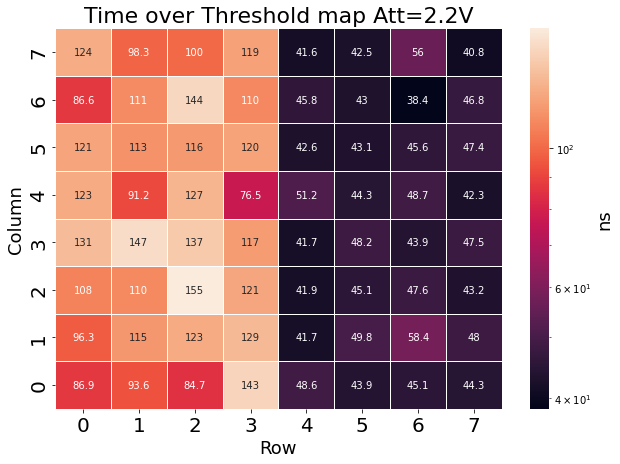

In [8]:
totmap= np.reshape(tot2,(8,8))

fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Time over Threshold map Att=2.2V',fontsize=22)
ax=sns.heatmap(totmap*10**9, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [9]:
alldata=[]

for z in range(len(a)):
    data11=[]
    data=np.genfromtxt(a[z],delimiter='\t',dtype=str,autostrip=True)
    for i in range(len(data)):
        temp=[]
        tempdata= data[i][1:-1].split()
        tempdata= np.char.strip(tempdata)
        for j in range(len(tempdata)):
            tempdata[j]=tempdata[j].replace(",","")
        for k in range(len(tempdata)):
            temp.append(float(tempdata[k]))
        data11.append(temp)
    alldata.append(data11)

In [10]:
alltot=[]
allstd=[]
for i in range(len(alldata)):
    temp=[]
    temp1=[]
    for j in range(len(alldata[i])):
        temp1.append(np.mean(alldata[i][j]))
        temp.append(np.std(alldata[i][j]))
    alltot.append(temp1)
    allstd.append(temp)

In [11]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

pixels=[]
pixelstd=[]
for i in range(len(alldata[0])):
    temp=[]
    temp2=[]
    for j in range(len(alltot)):
        temp.append(alltot[j][i])
        temp2.append(allstd[j][i])
    pixels.append(temp)
    pixelstd.append(temp2)
    temp2=[]
    temp=[]


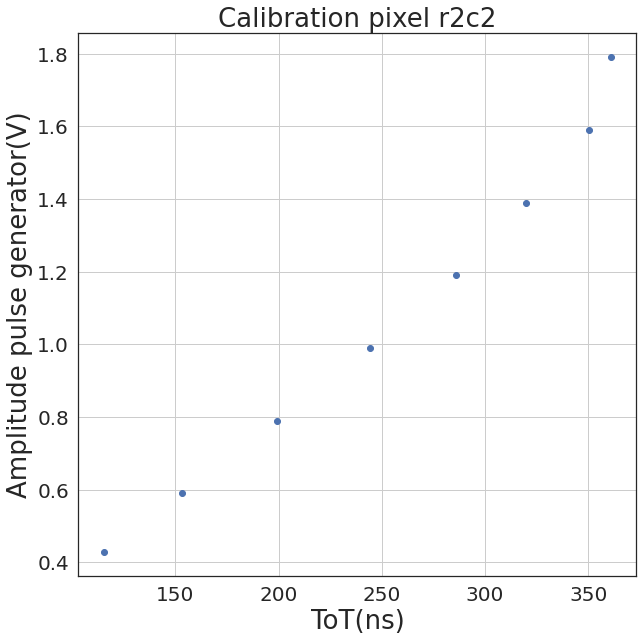

In [12]:
fig = plt.figure(figsize=(10,10))
plt.scatter(np.asarray(pixels[9])*10**9,v)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Amplitude pulse generator(V)",fontsize=26)
plt.title("Calibration pixel r2c2",fontsize=26)
plt.xlabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [13]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

electrons=[]
c=6.24*10**18
cont=(2.8*10**-15)*c
for i in range(len(v)):
    d=v[i]*cont
    electrons.append(d)
    
    
print(electrons)

[7512.96, 10308.48, 13802.880000000001, 17297.28, 20791.68, 24286.079999999998, 27780.480000000003, 31274.88]


In [14]:
pl=[225,280,323,375]
chaa=[]
for i in range(len(pl)):
    chaa.append((pl[i]+7.083)/0.0161)
    
print(chaa)

[14415.093167701863, 17831.242236024846, 20502.049689440995, 23731.86335403727]


In [15]:
yerr=[]
for i in range(len(allstd[0])):
    temp=[]
    for j in range(len(allstd)):
        temp.append(allstd[j][i])
    yerr.append(temp)
    temp=[]

In [16]:
z=5

ms=[]
bs=[]
for i in range(len(pixels)):
    m,b = np.polyfit(electrons[0:z],pixels[i][0:z],1)
    ms.append(m)
    bs.append(b)

electrons= np.asarray(electrons)

ms[0]*10**9

0.0075706278626298685

<Figure size 720x720 with 0 Axes>

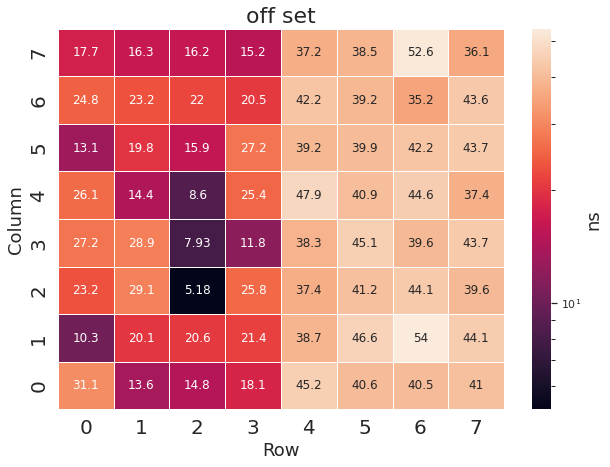

In [17]:
msmap= np.reshape(bs,(8,8))

fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('off set',fontsize=22)
ax=sns.heatmap(msmap*10**9, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

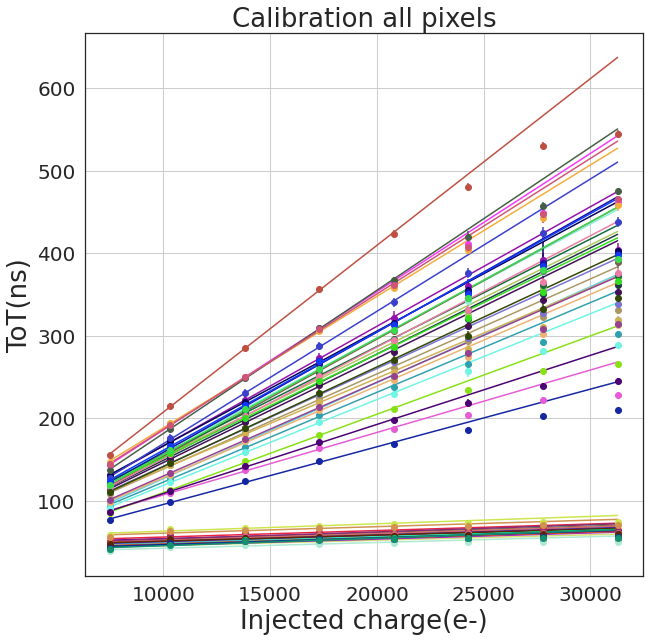

In [18]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    plt.plot(electrons, (electrons*ms[i]+bs[i])*10**9,color=colors[i])
    plt.errorbar(electrons,np.asarray(pixels[i])*10**9, yerr= np.asarray(yerr[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [19]:
ms=[]
bs=[]
for i in range(len(pixels)):
    m,b = np.polyfit(electrons[0:5],np.asarray(pixels[i][0:5]),1)
    ms.append(m)
    bs.append(b)

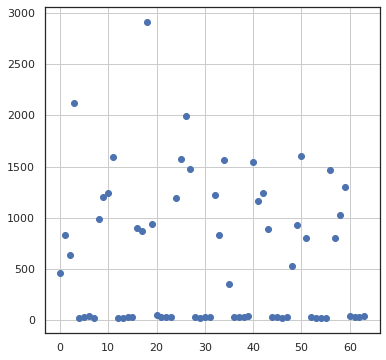

In [20]:
z=8


sq=[]

for i in range(len(pixels)):
    a=np.sum((np.polyval((np.polyfit(electrons[0:z],np.asarray(pixels[i][0:z])*10**9,1)),electrons[0:z])-np.asarray(pixels[i][0:z])*10**9)**2)
    sq.append(a)
    
index=np.arange(0,64,1)
fig = plt.figure(figsize=(6,6))
plt.scatter(index,sq)
plt.grid()
plt.show()


84.19756191423892
16.99241179151133


<Figure size 720x720 with 0 Axes>

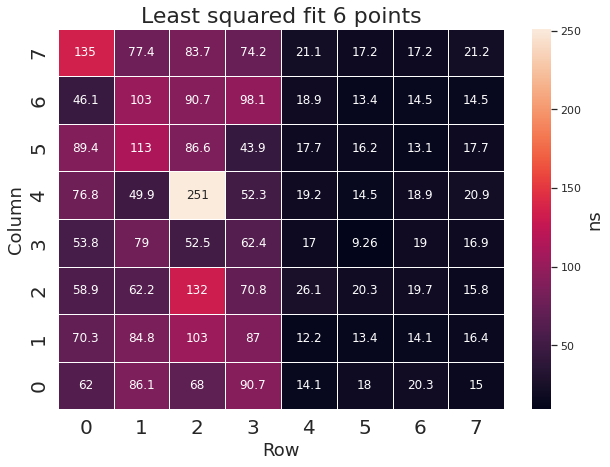

In [21]:
z=6

sq=[]

for i in range(len(pixels)):
    a=np.sum((np.polyval((np.polyfit(electrons[0:z],np.asarray(pixels[i][0:z])*10**9,1)),electrons[0:z])-np.asarray(pixels[i][0:z])*10**9)**2)
    sq.append(a)


totmap= np.reshape(sq,(8,8))

print(np.mean(totmap[0:8,0:4]))
print(np.mean(totmap[0:8,4:8]))

fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Least squared fit 6 points',fontsize=22)
ax=sns.heatmap(totmap, linewidth=0.5,annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()


In [22]:
electrons[0:6]

array([ 7512.96, 10308.48, 13802.88, 17297.28, 20791.68, 24286.08])

In [23]:
def func_log(x, a, b, c):
    return a * np.log(abs(b * x)) + c


def func2(x,a,b,c):
    return a*(1-np.e**(-b*x)) +c

In [24]:
i=2

x=electrons
y=np.asarray(pixels[i])*10**9

In [25]:

p0=[10,10,0]
popt, pcov = curve_fit(func_log, x, y,p0)


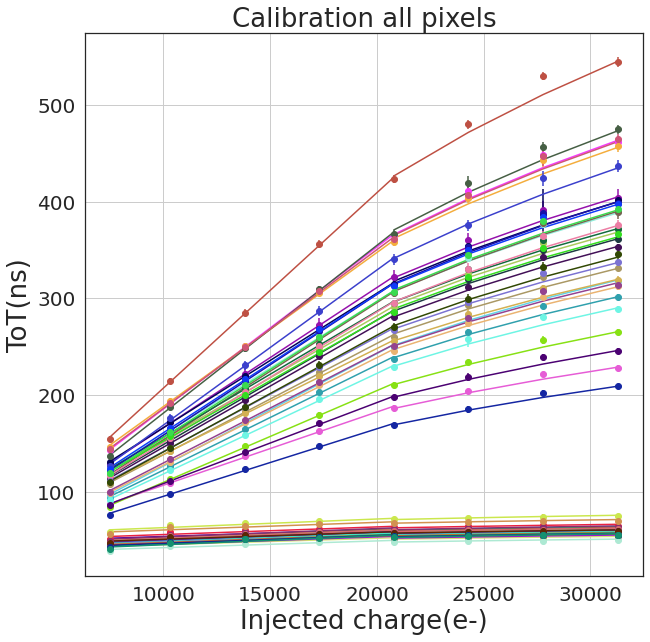

In [26]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    x=electrons
    y=np.asarray(pixels[i])*10**9
    popt, pcov = curve_fit(func_log, x, y,p0)
    plt.plot(electrons[4:8], func_log(electrons[4:8],popt[0],popt[1],popt[2]),color=colors[i])
    plt.plot(electrons[0:5], (electrons[0:5]*ms[i]+bs[i])*10**9,color=colors[i])
    plt.errorbar(electrons,np.asarray(pixels[i])*10**9, yerr= np.asarray(yerr[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

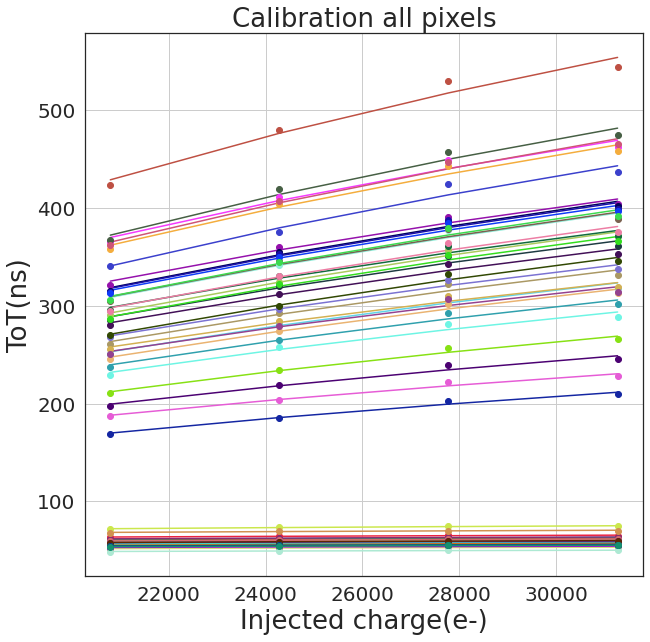

In [27]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    x=electrons
    y=np.asarray(pixels[i])*10**9
    popt, pcov = curve_fit(func_log, x[4:8], y[4:8],p0)
    plt.plot(electrons[4:8], func_log(electrons[4:8],popt[0],popt[1],popt[2]),color=colors[i])
    plt.errorbar(electrons[4:8],(np.asarray(pixels[i][4:8])*10**9),fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [28]:
def func2(x,a,b):
    return a*(1-np.e**(-(x/(b*10**3.5))))

/home/pixel/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


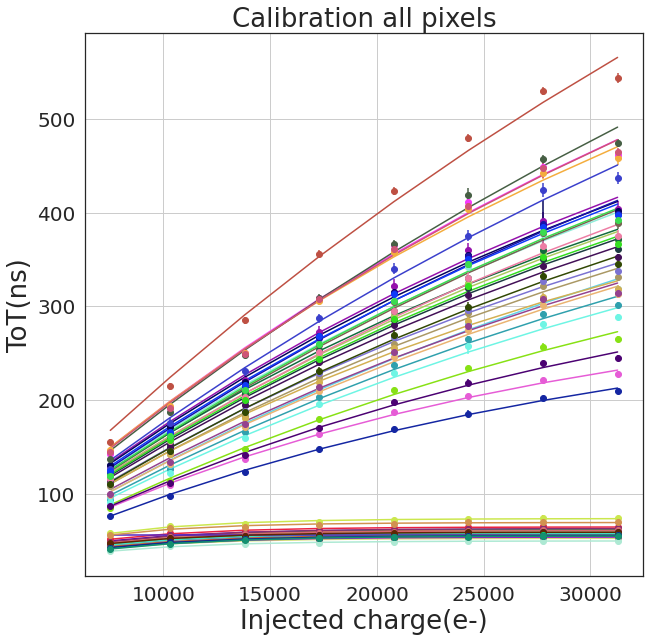

In [29]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    x=electrons
    y=np.asarray(pixels[i])*10**9
    popt, pcov = curve_fit(func2, x, y)
    plt.plot(electrons, func2(electrons,popt[0],popt[1]),color=colors[i])
    plt.errorbar(electrons,np.asarray(pixels[i])*10**9, yerr= np.asarray(yerr[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [30]:
np.shape(pixels)

(64, 8)

In [31]:
reset=[]
i=4
while i < 65:
    reset.append(pixels[i])
    i=i+8

i=5

while i < 65:
    reset.append(pixels[i])
    i=i+8

i=6
    
while i < 65:
    reset.append(pixels[i])
    i=i+8

i=7
 
while i < 65:
    reset.append(pixels[i])
    i=i+8


In [32]:
yerr2=[]

i=4
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=5

while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=6
    
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=7
 
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

In [33]:
len(yerr2)

32

In [34]:
z=5

ms1=[]
bs1=[]
for i in range(len(reset)):
    m,b = np.polyfit(electrons[0:z],reset[i][0:z],1)
    ms1.append(m)
    bs1.append(b)

electrons= np.asarray(electrons)


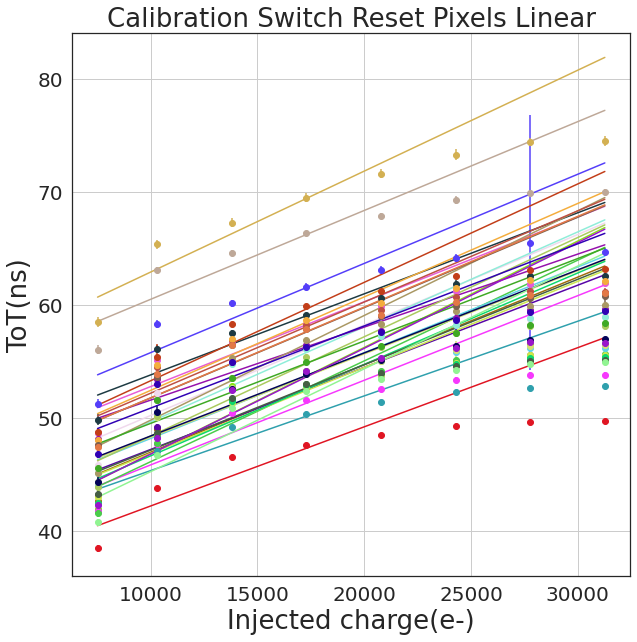

In [35]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms1)):
    plt.plot(electrons, (electrons*ms1[i]+bs1[i])*10**9,color=colors[i])
    plt.errorbar(electrons,np.asarray(reset[i])*10**9, yerr= np.asarray(yerr2[i])*10**9,fmt='o', color=colors[i])

fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration Switch Reset Pixels Linear",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [36]:
def func3(x,a,b,c,d):
    return a*x + b + c/(x-d)

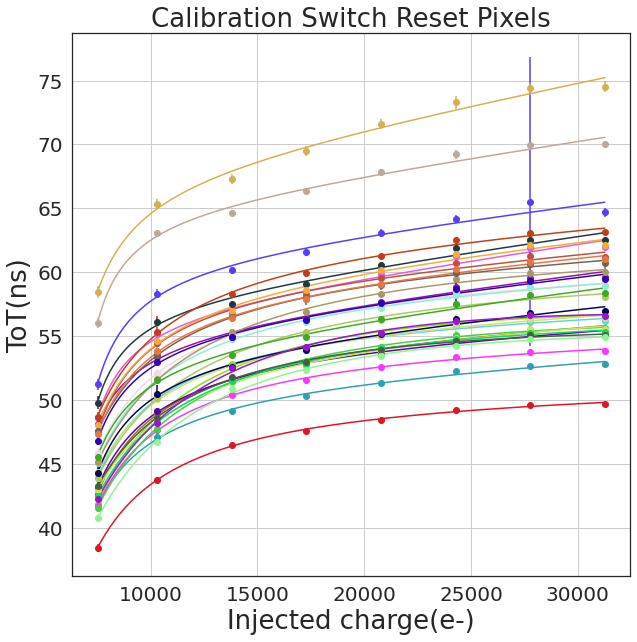

In [37]:
fig = plt.figure(figsize=(10,10))



for i in range(len(reset)):
    x=electrons
    y=np.asarray(reset[i])*10**9
    x2=np.linspace(electrons[0],electrons[-1],200)
    popt, pcov = curve_fit(func3, x, y)
    plt.plot(x2, func3(x2,popt[0],popt[1],popt[2],popt[3]),color=colors[i])
    plt.errorbar(electrons,np.asarray(reset[i])*10**9, yerr= np.asarray(yerr2[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration Switch Reset Pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [38]:
popt

array([-8.84552496e-05,  6.19586941e+01, -1.27695087e+05,  1.30601355e+03])